## Data Augmentation

In [1]:
base_path = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/Cropped/based_on_truth/x100100y100100z8080"
volumes_path = base_path + "/volumes"
points_path = base_path + "/points"
length_path = base_path + "/length"


In [2]:
import numpy as np
import Functions.MyDataset as MyDataset

pat_name = "JM"
pat_volume_left = np.load(f"{volumes_path}/{pat_name}_augVolume_1_cropped_left.npy")
pat_volume_right = np.load(f"{volumes_path}/{pat_name}_augVolume_1_cropped_right.npy")
pat_point_left = np.load(f"{points_path}/{pat_name}_augPoints_1_cropped_left.npy")
pat_point_right = np.load(f"{points_path}/{pat_name}_augPoints_1_cropped_right.npy")
pat_length_left = np.load(f"{length_path}/{pat_name}_augLength_1_cropped_left.npy")
pat_length_right = np.load(f"{length_path}/{pat_name}_augLength_1_cropped_right.npy")

In [3]:
# point_left_diff = np.asarray([[0, 0, 0], [0, 0, 0]])
# point_right_diff = np.asarray([[0, 0, 0], [0, 0, 0]])
point_left_diff = np.asarray([[0, 0, 0], [0, 0, 0]])
point_right_diff = np.asarray([[0, 0, 0], [0, 0, 0]])

pat_point_left_new = pat_point_left - point_left_diff
pat_length_left_new = pat_length_left + point_left_diff

point_right_diff[:, 0] = - point_right_diff[:, 0]
pat_point_right_new = pat_point_right - point_right_diff
pat_length_right_new = pat_length_right + point_right_diff

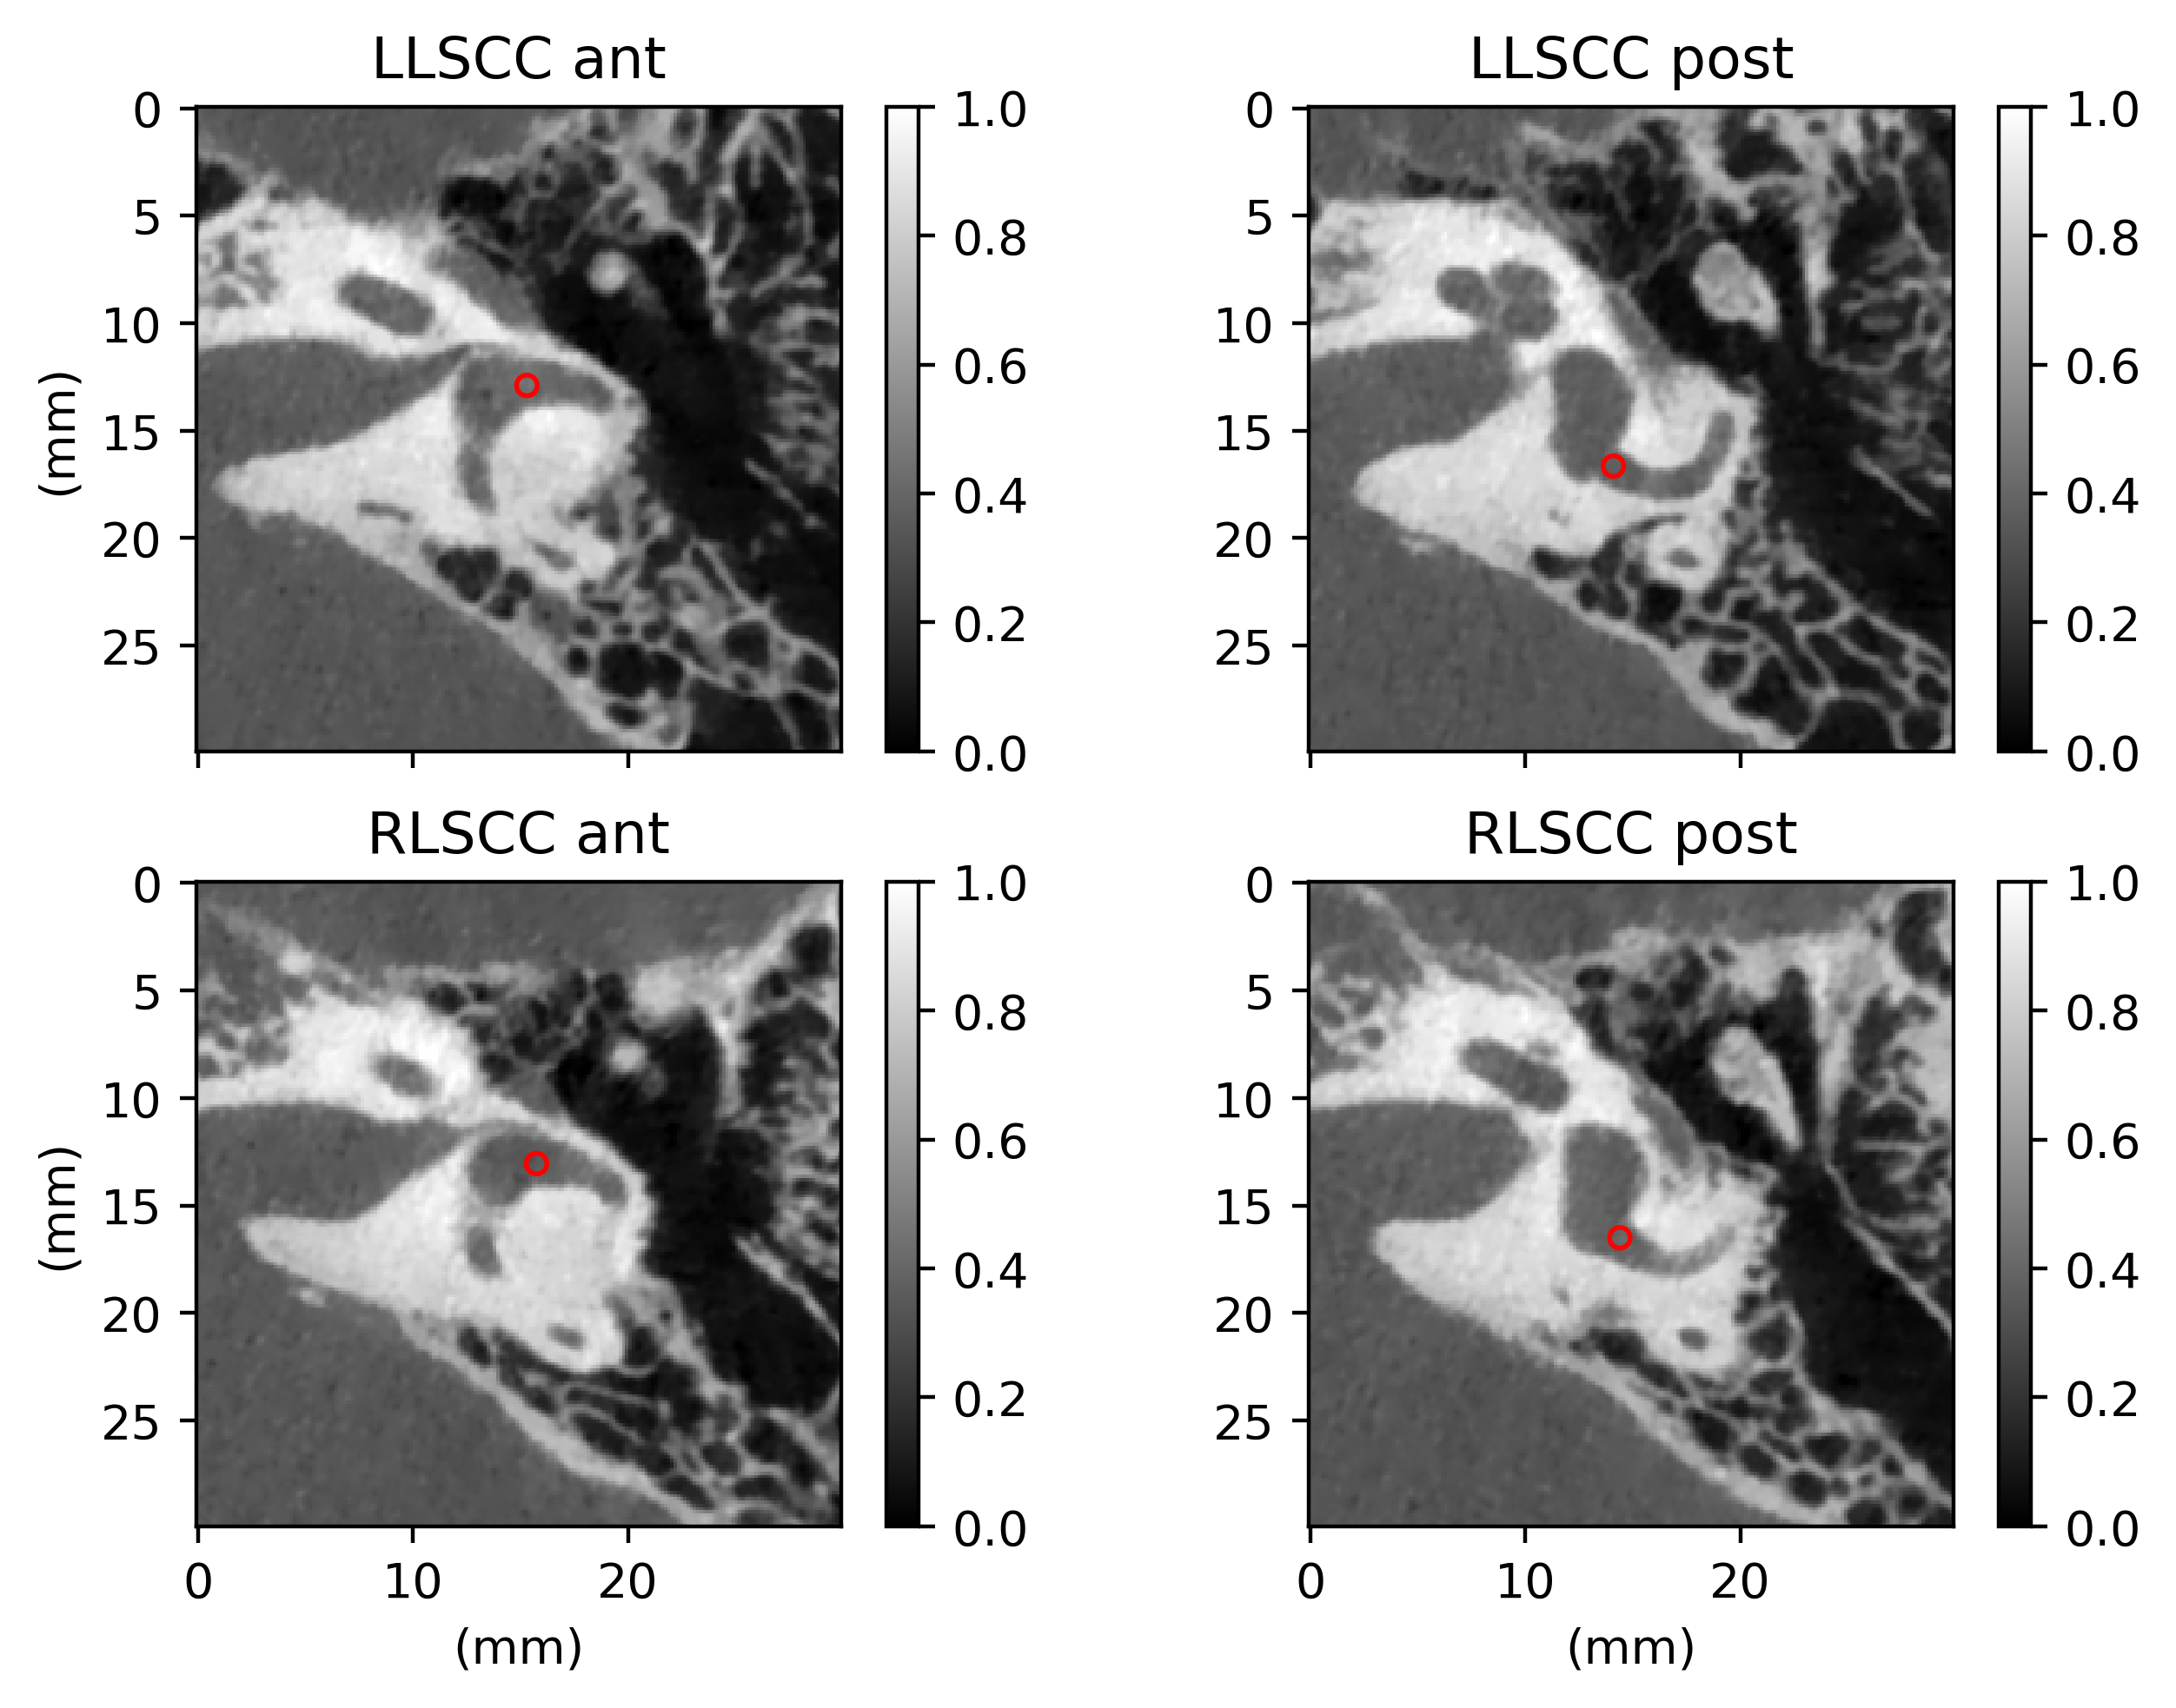

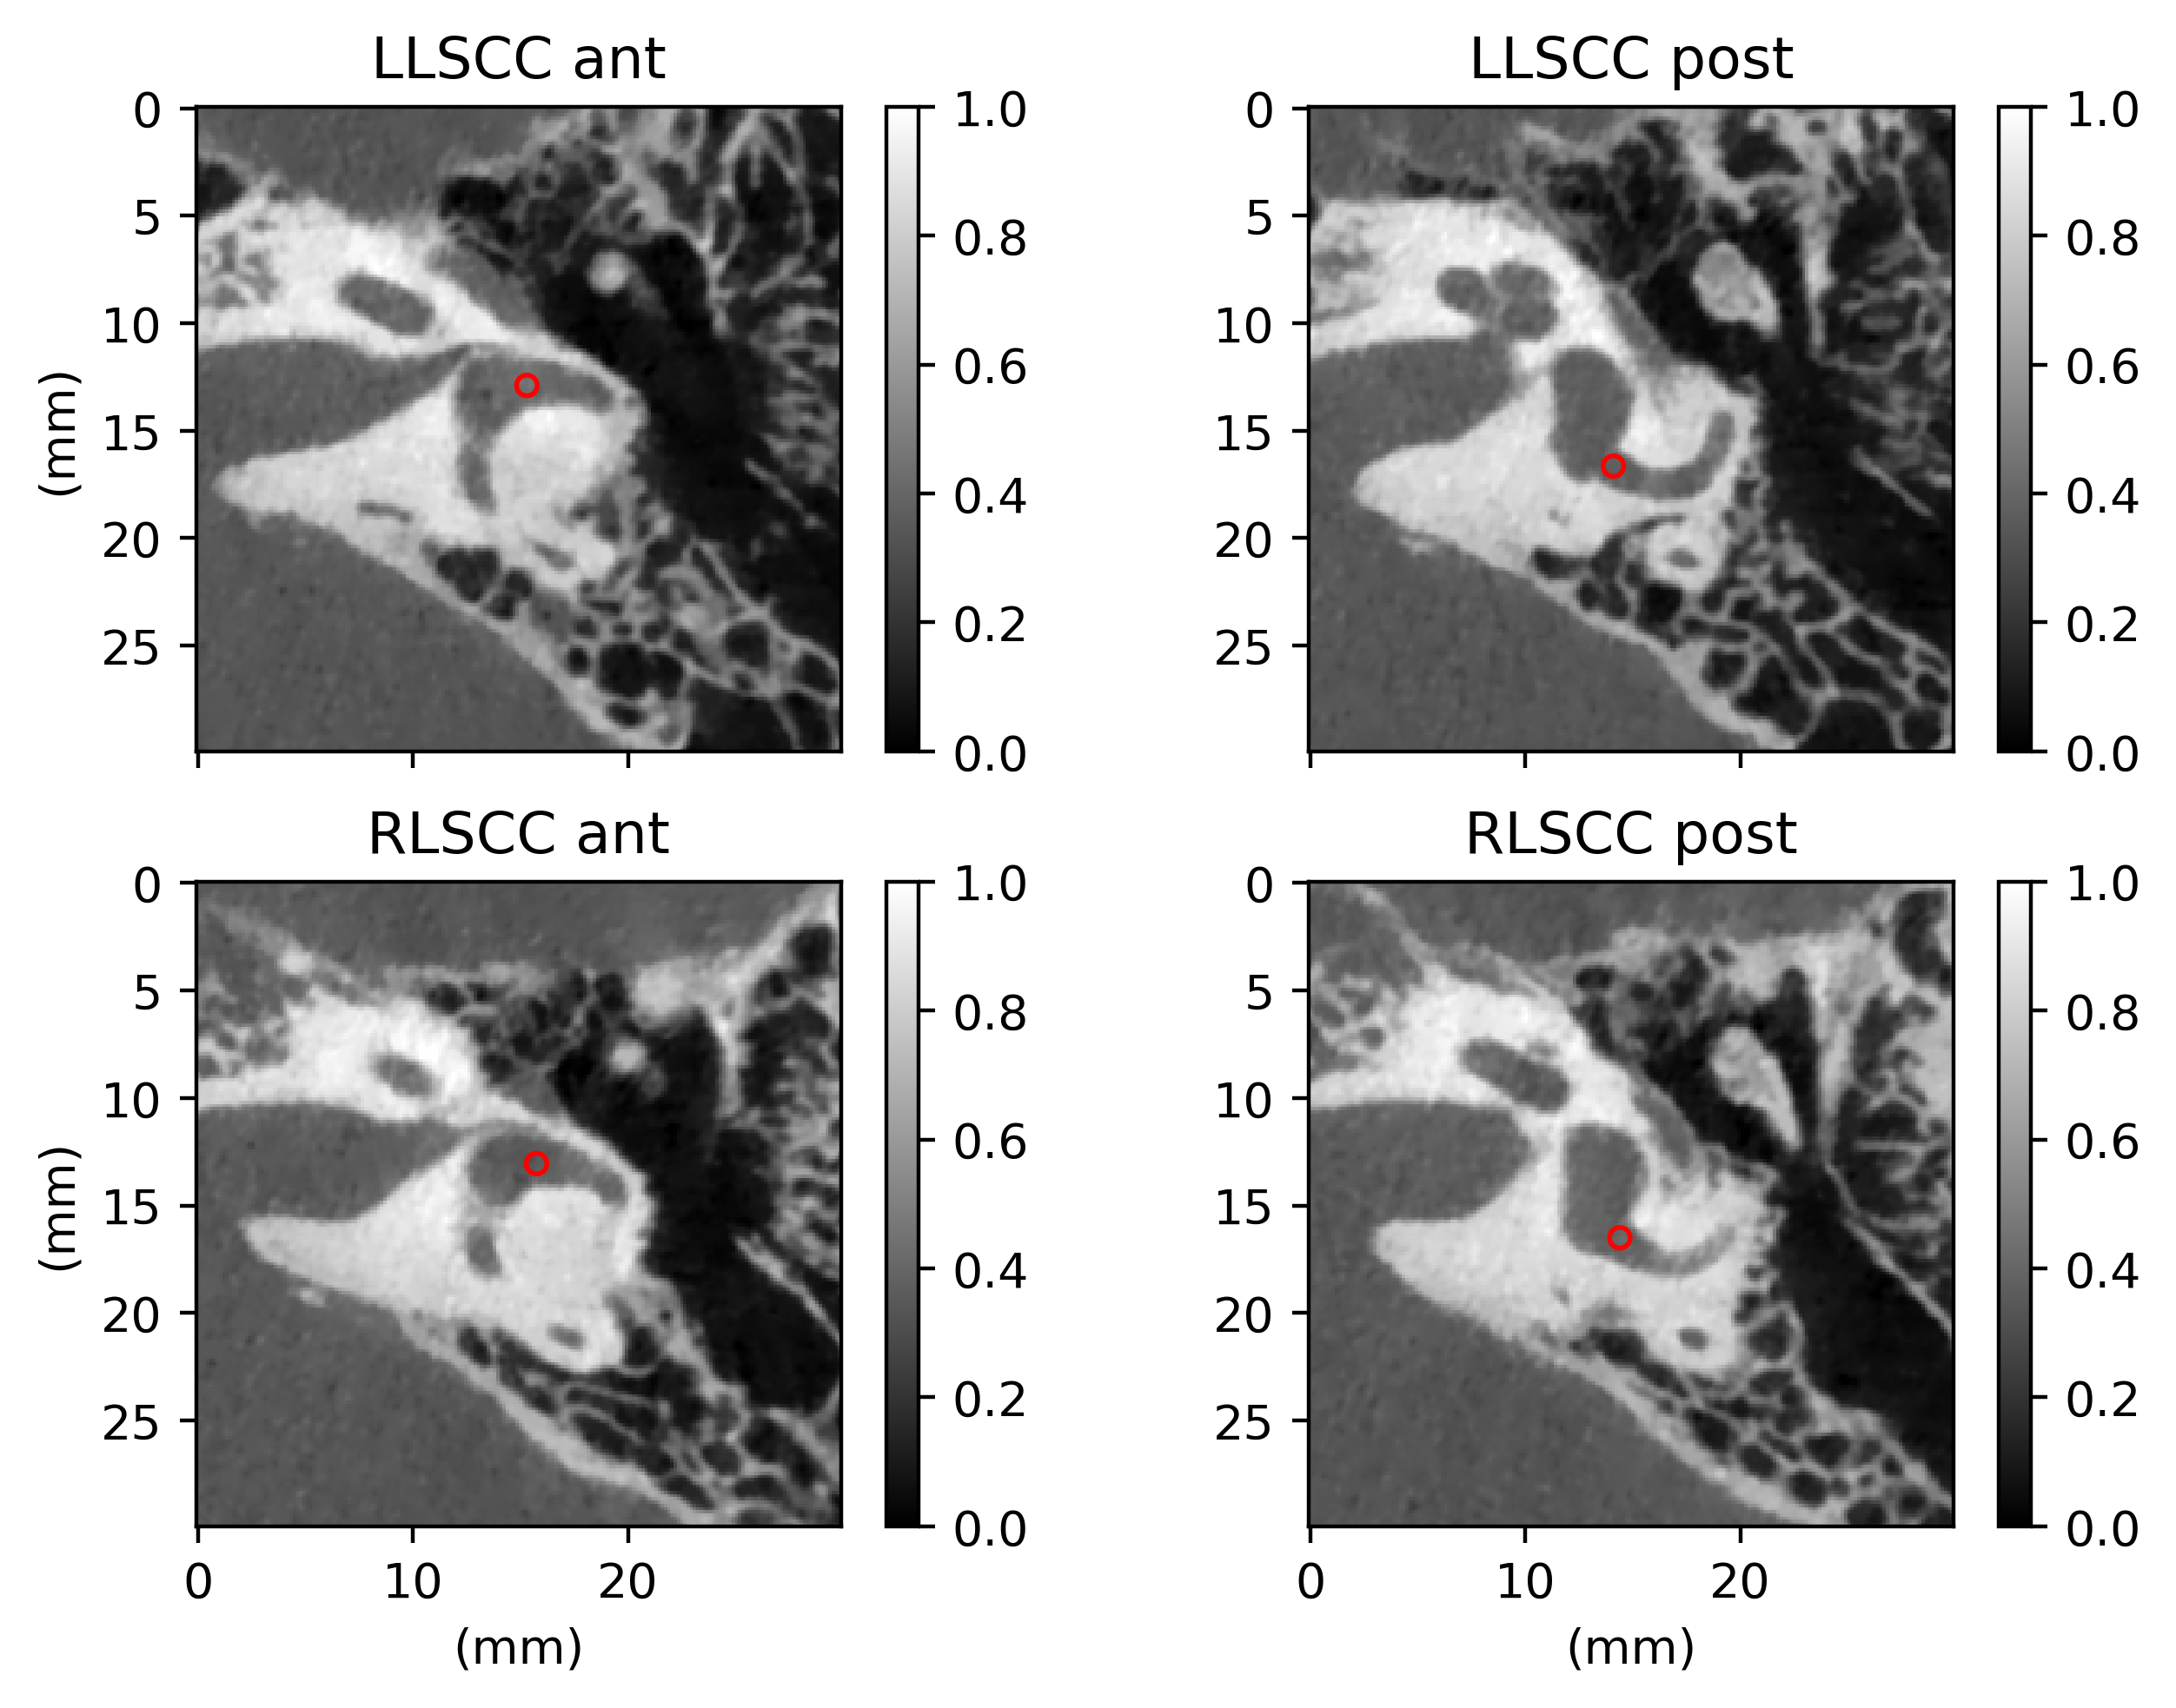

In [4]:
import Functions.Visualization as Visualization

import importlib
importlib.reload(Visualization)

Visualization.show_two_landmarks(pat_volume_left, pat_point_left, pat_volume_right, pat_point_right, [0.15, 0.15, 0.15])

Visualization.show_two_landmarks(pat_volume_left, pat_point_left_new, pat_volume_right, pat_point_right_new, [0.15, 0.15, 0.15])

In [5]:
import math

def angle_3D_points(x1, y1, z1,
                    x2, y2, z2,
                    x3, y3, z3):
    # Find direction ratio of line AB
    ABx = x1 - x2;
    ABy = y1 - y2;
    ABz = z1 - z2;

    # Find direction ratio of line BC
    BCx = x3 - x2;
    BCy = y3 - y2;
    BCz = z3 - z2;
    
    v1_mag = math.sqrt(ABx*ABx + ABy*ABy + ABz*ABz)
    v1_norm = (ABx/v1_mag, ABy/v1_mag, ABz/v1_mag)

    v2_mag = math.sqrt(BCx*BCx + BCy*BCy + BCz*BCz)
    v2_norm = (BCx/v2_mag, BCy/v2_mag, BCz/v2_mag)
    
    dot_products = v1_norm[0] * v2_norm[0] + v1_norm[1] * v2_norm[1] + v1_norm[2] * v2_norm[2]
    
    angle = (math.acos(dot_products) * 180.0) / math.pi
    print(round(angle, 2))
    
    return round(angle, 2)


In [6]:
def cal_angles(pt_points, pt_points_new):
    (Ax1, Ay1, Az1) = pt_points[0]
    (Bx2, By2, Bz2) = np.mean(pt_points, axis=0)
    angle_3D_points(Ax1, Ay1, Az1,
                   Bx2, By2, Bz2,
                   Bx2+1, By2, Bz2)
    angle_3D_points(Ax1, Ay1, Az1,
                   Bx2, By2, Bz2,
                   Bx2, By2+1, Bz2)
    angle_3D_points(Ax1, Ay1, Az1,
                   Bx2, By2, Bz2,
                   Bx2, By2, Bz2+1)

    (Ax1_, Ay1_, Az1_) = pt_points_new[0]
    (Bx2_, By2_, Bz2_) = np.mean(pt_points_new, axis=0)
    angle_3D_points(Ax1_, Ay1_, Az1_,
                   Bx2_, By2_, Bz2_,
                   Bx2_+1, By2_, Bz2_)
    angle_3D_points(Ax1_, Ay1_, Az1_,
                   Bx2_, By2_, Bz2_,
                   Bx2_, By2_+1, Bz2_)
    angle_3D_points(Ax1_, Ay1_, Az1_,
                   Bx2_, By2_, Bz2_,
                   Bx2_, By2_, Bz2_+1)

In [7]:
cal_angles(pat_point_left, pat_point_left_new)

72.87
156.96
75.07
72.87
156.96
75.07


## find way to rotate and translate

In [8]:
from scipy import ndimage

v_left = np.reshape(pat_volume_left, (200, 200, 160))
p_left = np.copy(pat_point_left)

In [9]:
centre = np.asarray([100, 100, 80]) - 1
org = np.mean(pat_point_left, axis=0) - 1
shift_value = np.ceil(centre - org)

In [10]:
v_left_shift = ndimage.shift(v_left, shift_value)
p_left_shift = p_left + shift_value

In [11]:
print(v_left_shift[:, :, 146])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.33796895 0.34831824 ... 0.33214748 0.33376455 0.33602846]
 [0.         0.34282018 0.35316947 ... 0.33117723 0.33570505 0.33344114]
 ...
 [0.         0.32309185 0.32276843 ... 0.31759379 0.33150065 0.33732212]
 [0.         0.3305304  0.32244502 ... 0.32729625 0.32600259 0.33150065]
 [0.         0.33602846 0.32276843 ... 0.33408797 0.31597671 0.32082794]]


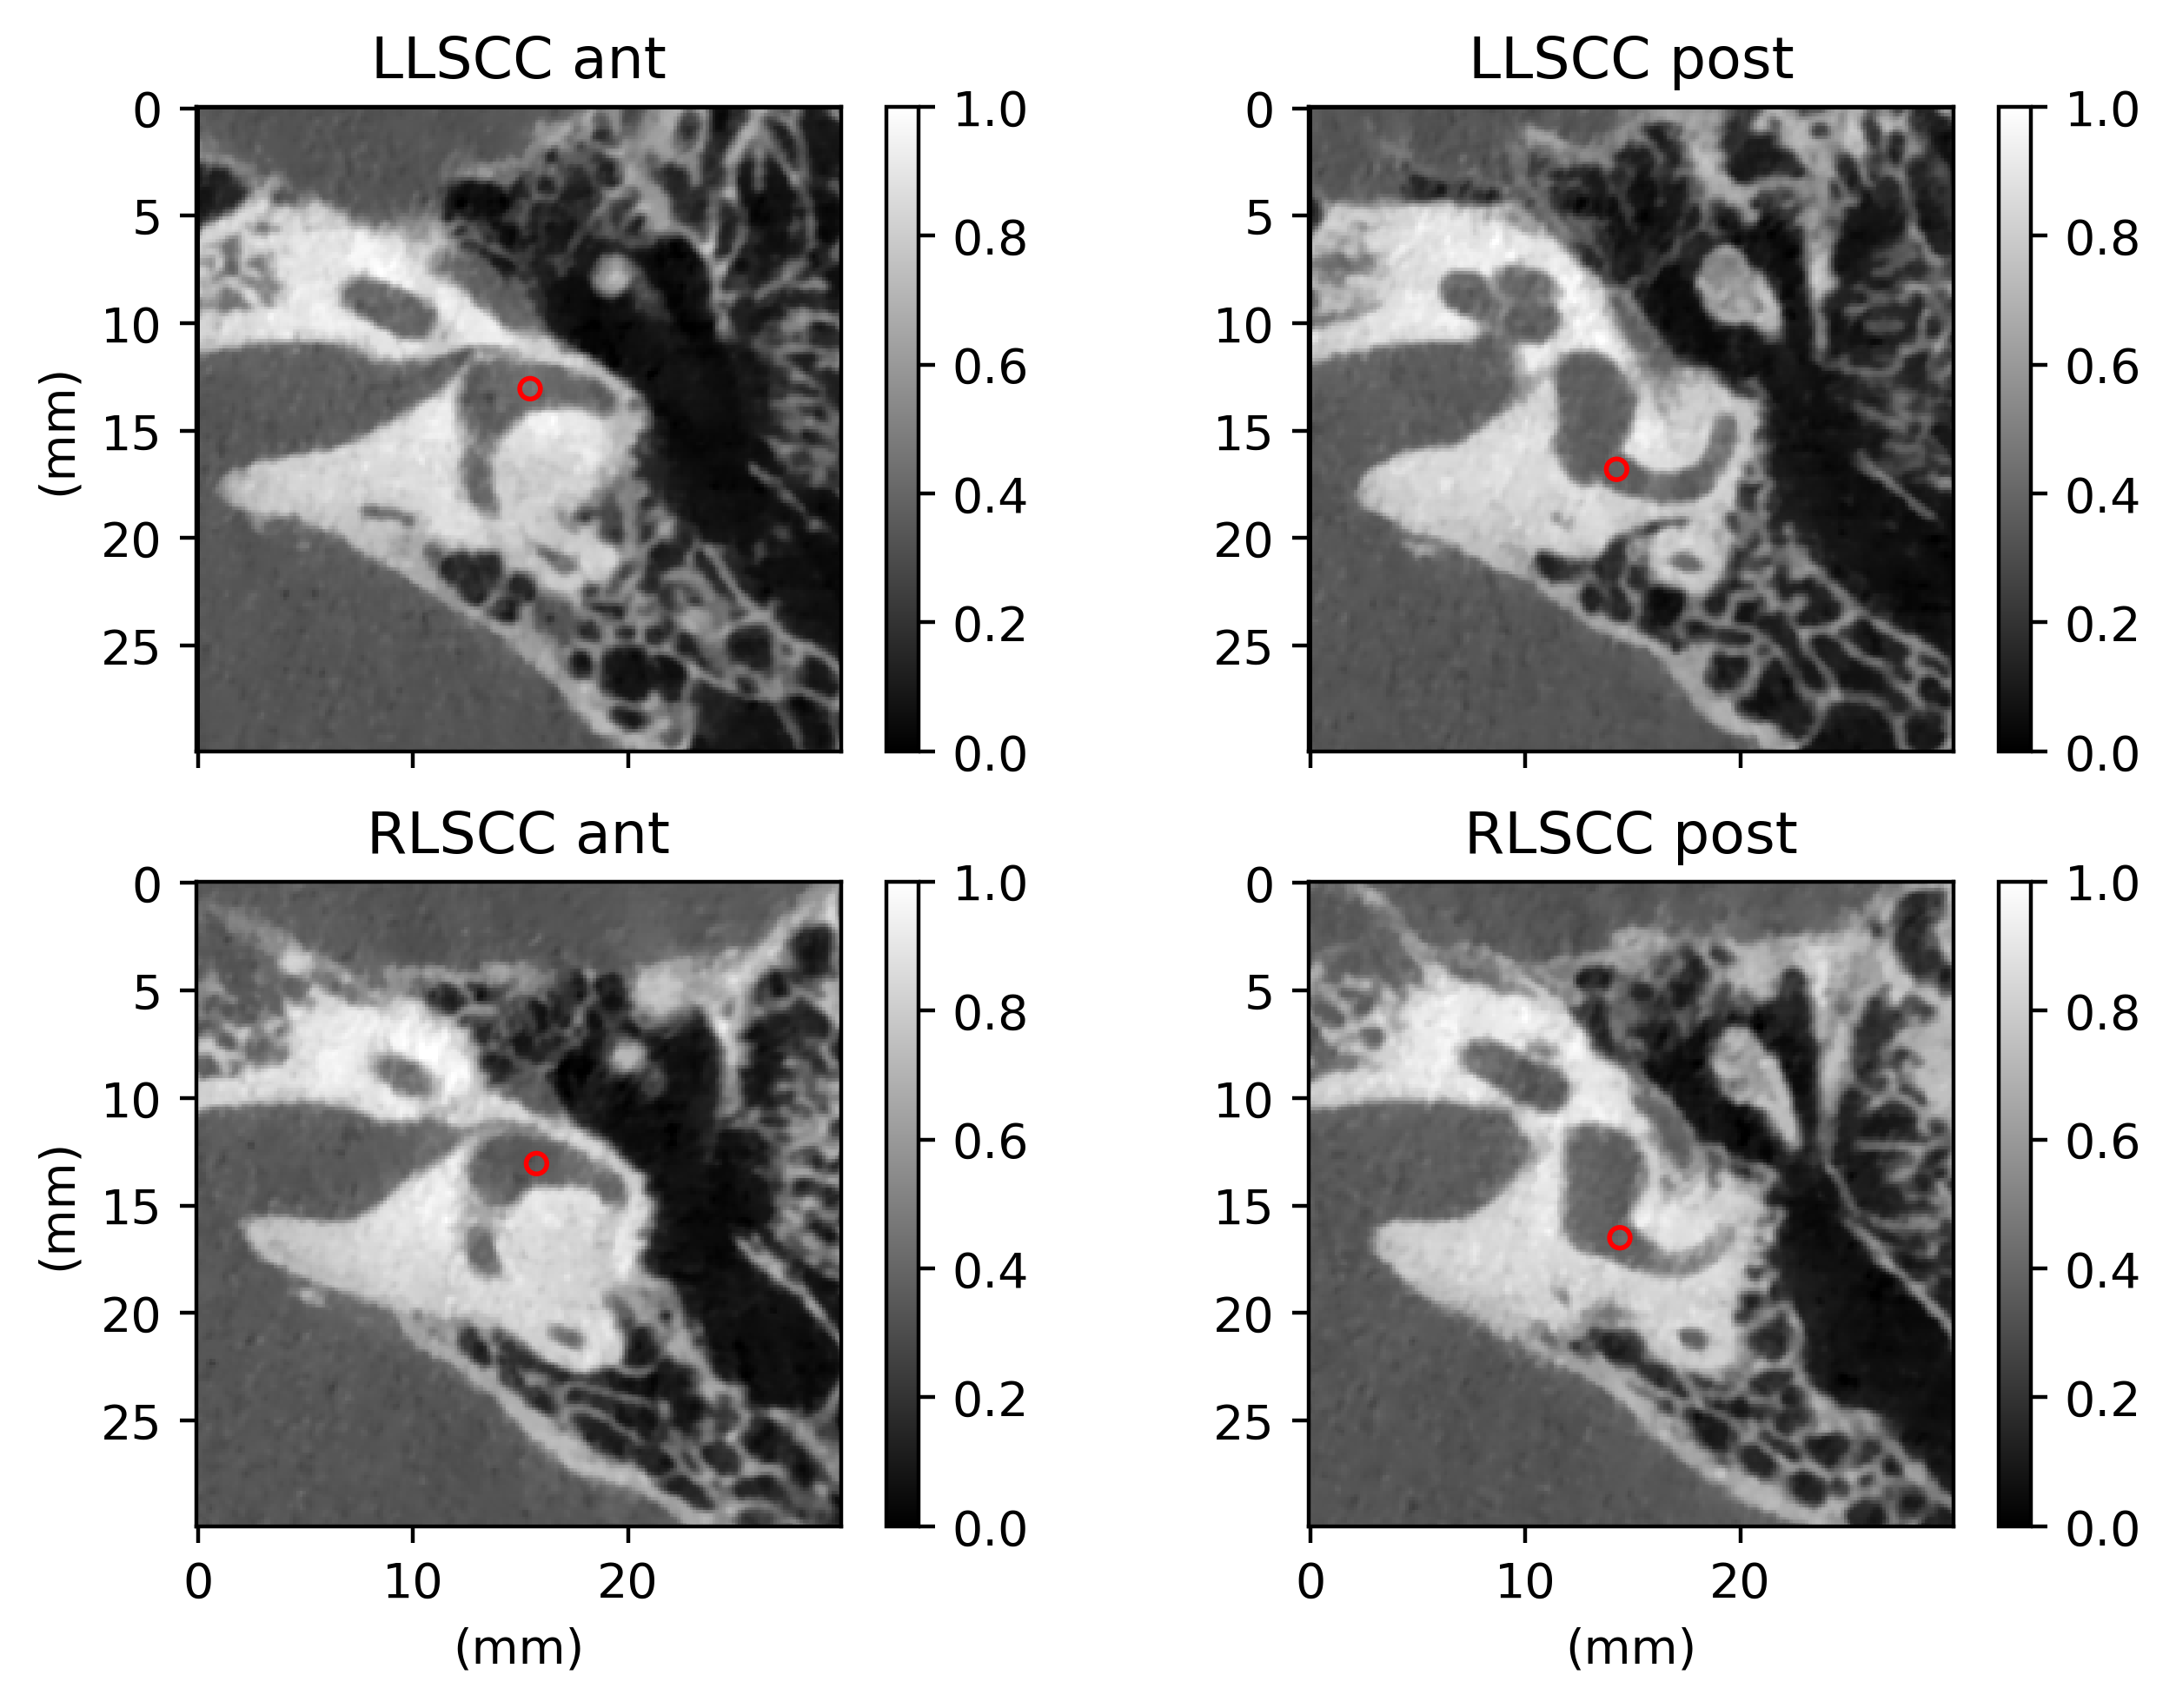

In [12]:
Visualization.show_two_landmarks(v_left_shift, p_left_shift, pat_volume_right, pat_point_right, [0.15, 0.15, 0.15])

In [17]:
v_left_15 = ndimage.rotate(v_left_shift, 45, reshape=False)

In [18]:
import numpy as np
import math

def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians (Euler-Rodrigues formula).
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

org_centre = np.asarray([200, 200, 160]) / 2.
rot_centre = np.asarray(v_left_15.shape) / 2.

v = p_left_shift - org_centre
axis = np.asarray([100, 100, 70]) - org_centre
theta = 45 * math.pi / 180.

p_new = np.dot(rotation_matrix(axis, theta), v.T)
p_new = p_new.T + rot_centre
print(p_new)

[[ 94.34314575  88.6862915   84.        ]
 [106.36396103 112.02081528  77.        ]]


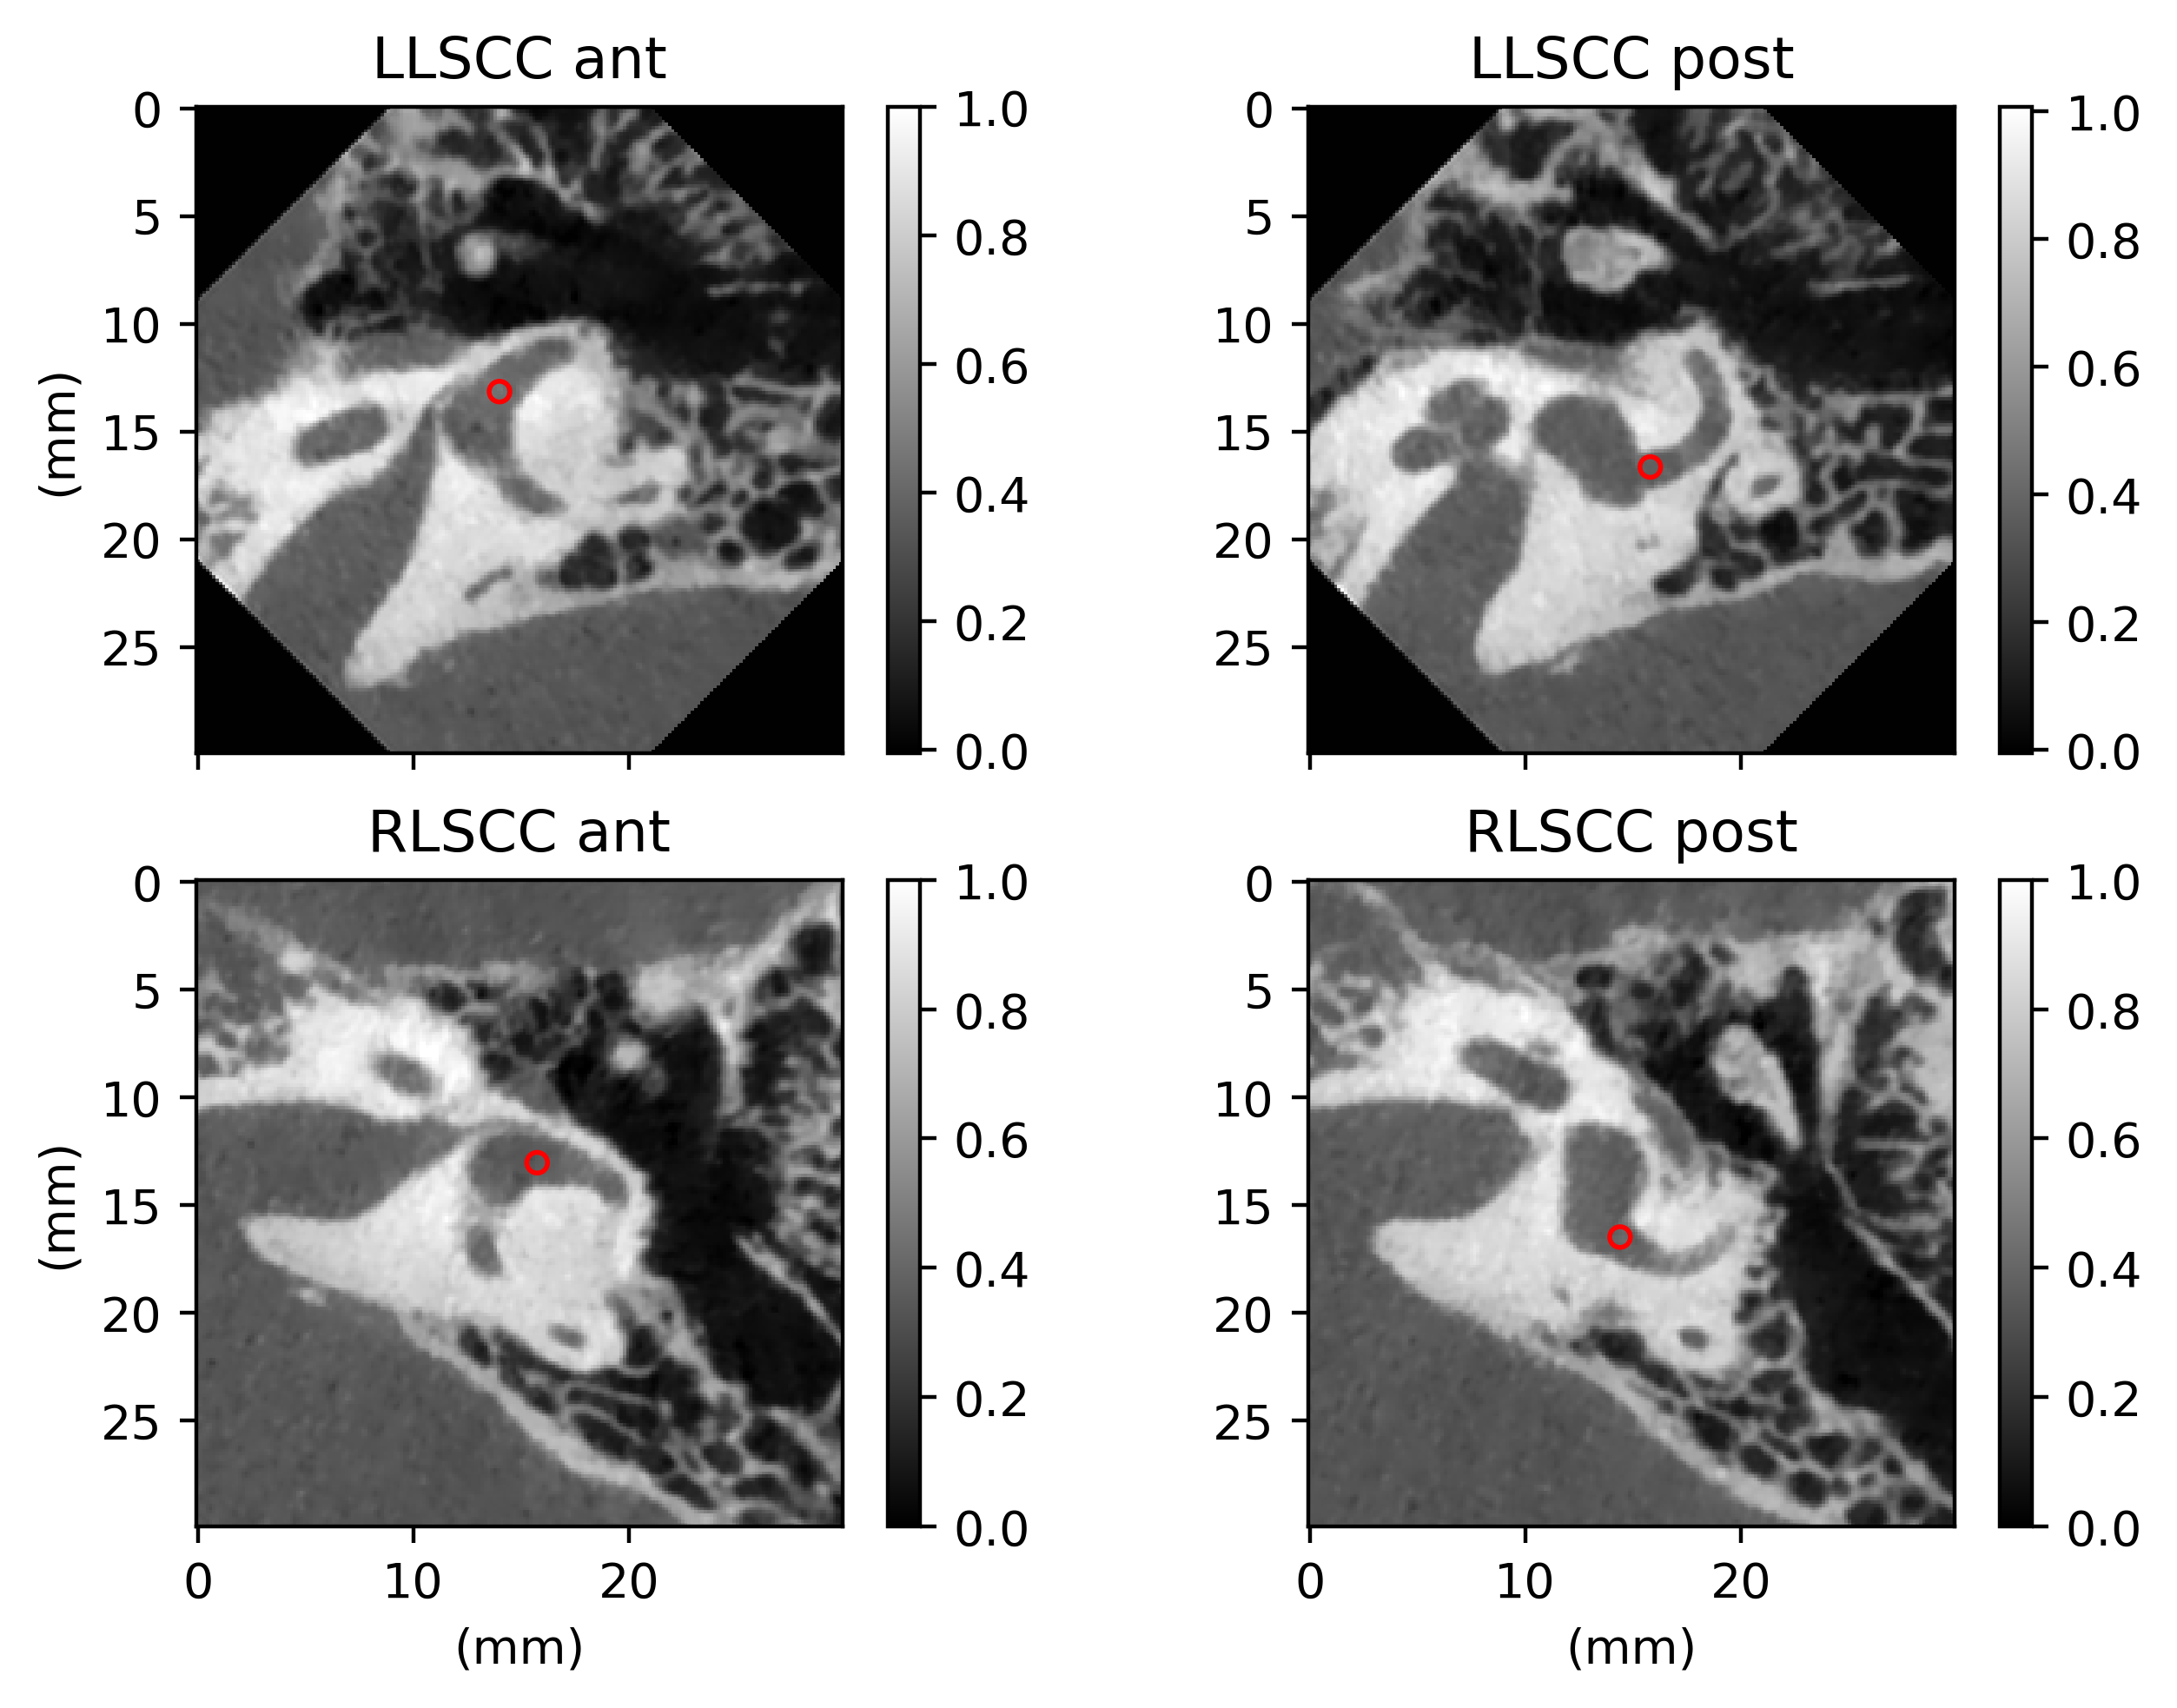

In [19]:
Visualization.show_two_landmarks(v_left_15, p_new, pat_volume_right, pat_point_right, [0.15, 0.15, 0.15])

In [20]:
cal_angles(pat_point_left, p_new)

72.87
156.96
75.07
116.26
149.2
75.07


## Check the relations between the max err and the angles

In [2]:
import numpy as np

base_dir = "/Users/achs/PhD/code/CT-MRI_LandmarkDetection/Spartan/trained_models"

Y_test_gt = np.load(f"{base_dir}/cropped_dataset/straight_model/one_landmark/100x100x100/no_trans/y_test_gt.npy")
Y_test_pr = np.load(f"{base_dir}/cropped_dataset/straight_model/one_landmark/100x100x100/no_trans/bestVal_straight_model_cropped_100x100x100_y_test.npy")

In [3]:
err_diff = Y_test_pr - Y_test_gt

In [4]:
err_diff_p2 = np.power(err_diff, 2)
sum_square_err_diff = np.sum(err_diff_p2, axis= (1,2) )
err_dis = np.power(sum_square_err_diff, 1/2) * 0.15
min_err_idx = np.argmin(err_dis, axis=0)
max_err_idx = np.argmax(err_dis, axis=0)
print(f"Min[{min_err_idx}]: {err_dis[min_err_idx]}")
print(f"Max[{max_err_idx}]: {err_dis[max_err_idx]}")
print(f"Mean: {np.mean(err_dis)}")

Min[289]: 0.07318983972072601
Max[125]: 0.7054455876350403
Mean: 0.2796856760978699


In [9]:
import Functions.MyDataset as MyDataset

import importlib
importlib.reload(MyDataset)

pt_name, pt_aug_id = MyDataset.get_pat_from_test_idx(125, split=True)

In [13]:
check_base_dir = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/Cropped/based_on_truth/x100100y100100z8080/tmp"

ck_side = "left"
ck_pt_volume = np.load(f"{check_base_dir}/{pt_name}_augVolume_{pt_aug_id}_cropped_{ck_side}.npy")
ck_pt_points = np.load(f"{check_base_dir}/{pt_name}_augPoints_{pt_aug_id}_cropped_{ck_side}.npy")
ck_pt_length = np.load(f"{check_base_dir}/{pt_name}_augLength_{pt_aug_id}_cropped_{ck_side}.npy")

In [14]:
ck_pt_volume = np.reshape(ck_pt_volume, (1, 200, 200, 160, 1))
ck_pt_points = np.reshape(ck_pt_points, (1, 2, 3))
ck_pt_length = np.reshape(ck_pt_length, (1, 2, 3))

In [12]:
import Functions.MyCrop as MyCrop

crop_layer = np.asarray([[25, 25], [25, 25], [30, 30]])

ck_pt_volume, ck_pt_points, ck_pt_length = MyCrop.crop_outside_layers(ck_pt_volume, ck_pt_points, ck_pt_length, crop_layer, keep_blank=False)

In [ ]:
ck_pt_volume = np.reshape(ck_pt_volume, (150, 200, 160, 1))
ck_pt_points = np.reshape(ck_pt_points, (2, 3))
ck_pt_length = np.reshape(ck_pt_length, (2, 3))